# 8.1.3 数据质量增强

1. Import the packages

In [6]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

2. Load the dataset

In [7]:
# Load the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [10]:
# Data characteristics
print('Training images : {}'.format(X_train.shape))
print('Testing images : {}'.format(X_test.shape))

Training images : (50000, 32, 32, 3)
Testing images : (10000, 32, 32, 3)


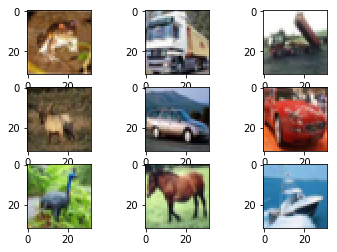

In [12]:
# Creating a grid of 3*3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img=X_train[i]
    plt.imshow(img)
    
plt.show()

In [15]:
# Preprocessing the dataset

# Fix random seed for reproducibiltiy 
seed= 6

np.random.seed(seed)

#Load the data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

#Normalize the inputs to (0.0-1.0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0


In [ ]:
print(X_train[0])

In [19]:
# Class labels shape

print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [22]:
# Use one hot encoding for class labels and create a vector of length 10
Y_train = np_utils.to_categorical(y_train)
Y_test =np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]
print(num_classes)

print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


3. Building and deploying the all CNN network

In [25]:
# Importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation , Conv2D ,GlobalAveragePooling2D
from keras.optimizers import SGD

In [31]:
# Define the model function

def allcnn(weights=None):
    
    # Define model type as sequential
    model = Sequential()
    
    # Add model layers
    model.add(Conv2D(96,(3,3),padding = 'same',input_shape = (32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding ='same',strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    #Add global average pooling layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #Load the weights
    
    if weights:
        model.load_weights(weights) 
   
    # Return the model
    return(model)
    
    
    

In [ ]:
 # Define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9


# Build model and define weights
weights = 'all_cnn_model_0.9011_0.5080.h5'
model=allcnn(weights)

#Define optimizer and compile model
sgd = SGD(lr =learning_rate, decay=weight_decay,momentum =momentum,nesterov = True)
model.compile(loss='categorical_crossentropy',optimizer=sgd , metrics=['accuracy'])

#Print model summary
print(model.summary())

# Test the model with pre trained weights

scores= model.evaluate(X_test,Y_test,verbose =1)
print('Accuracy:{}'.format(scores[1]))


Achieved `87.5%` accuracy